# Housing Prices Analysis
## By: Alyssa Bogaczyk

This notebook contains the full data science workflow for analyzing a housing prices dataset.  
I will perform data cleaning, exploratory data analysis (EDA), and apply regression modeling to predict house prices based on various features.

**Dataset Source:** [Housing Prices Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)



## About the Dataset

This dataset contains information on housing prices, including various features related to the properties and their sales. It includes 5000 records of houses with the following columns:

- **Price**: Final price of the house (target variable)
- **Bedrooms**: Number of bedrooms
- **Bathrooms**: Number of bathrooms
- **Area**: Total area (in square feet)
- **Stories**: Number of floors
- **Mainroad**: Whether the house is on the main road (yes/no)
- **Guestroom**: Presence of a guest room (yes/no)
- **Basement**: Presence of a basement (yes/no)
- **Hotwaterheating**: Availability of hot water heating (yes/no)
- **Airconditioning**: Availability of air conditioning (yes/no)
- **Parking**: Number of parking spots
- **Prefarea**: If the house is in a preferred area (yes/no)
- **Furnishingstatus**: Whether the house is furnished (furnished, semi-furnished, unfurnished)

#### My main goal is to predict house prices based on these characteristics using regression modeling.



In [118]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the CSV file into a pandas DataFrame
file_path = 'Housing.csv'
df = pd.read_csv(file_path, header=0)

# 3. Print the first 5 rows to verify correct loading
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


#### **In the next few cells, I conducted a basic data quality check using df.info(), df.isnull().sum(), df.dtypes. I also checked for columns with missing values or duplicate rows. This allowed me to understand the structure, completeness, and types of data in the dataset.**


In [221]:
# Dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      545 non-null    int64  
 1   Area                       545 non-null    int64  
 2   Bedrooms                   545 non-null    int64  
 3   Bathrooms                  545 non-null    int64  
 4   Stories                    545 non-null    int64  
 5   Mainroad                   545 non-null    int64  
 6   Guestroom                  545 non-null    int64  
 7   Basement                   545 non-null    int64  
 8   Hotwaterheating            545 non-null    int64  
 9   Airconditioning            545 non-null    int64  
 10  Parking                    545 non-null    int64  
 11  Prefarea                   545 non-null    int64  
 12  Furnishing_furnished       545 non-null    bool   
 13  Furnishing_semi-furnished  545 non-null    bool   

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea,log_price,log_area
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,15.306987,8.466765
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.372165,0.398196
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.375127,7.409136
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.048071,8.188967
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.283385,8.434029
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,15.562970,8.757941
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,16.403275,9.692828


In [123]:
# Confirming no missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [125]:
# Checking data types
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [127]:
# Identify if there are columns with missing values
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
Index([], dtype='object')


In [129]:
# Identify if there are duplicate rows
df.duplicated().sum()

0

## Data Quality and Cleaning

After inspecting the dataset, I confirmed that:

- There are **no missing values** in any of the 13 columns.
- There are **no duplicate rows** present.
- The dataset contains **545 rows** and **13 columns**.
- There are **6 numeric columns** (`int64`) and **7 categorical columns** (`object` dtype).

This initial quality check helps confirm the dataset is clean and ready for preprocessing and exploration. In the next steps, I will encode the categorical features for modeling and capitilize column titles for clarity.


In [132]:
# Capitalize all column names
df.columns = [col.capitalize() for col in df.columns]

# List of binary yes/no columns to label encode
binary_cols = ['Mainroad', 'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning', 'Prefarea']

# Map yes/no to 1/0
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode Furnishingstatus
df = pd.get_dummies(df, columns=['Furnishingstatus'], prefix='Furnishing')

# Check the updated dataframe
df.head()


,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea,Furnishing_furnished,Furnishing_semi-furnished,Furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


## Exploratory Data Analysis (EDA)

In this section, I examine the distributions of key numerical features, detect any outliers, and explore relationships between variables to uncover patterns in the data, with a particular focus on factors influencing house prices.

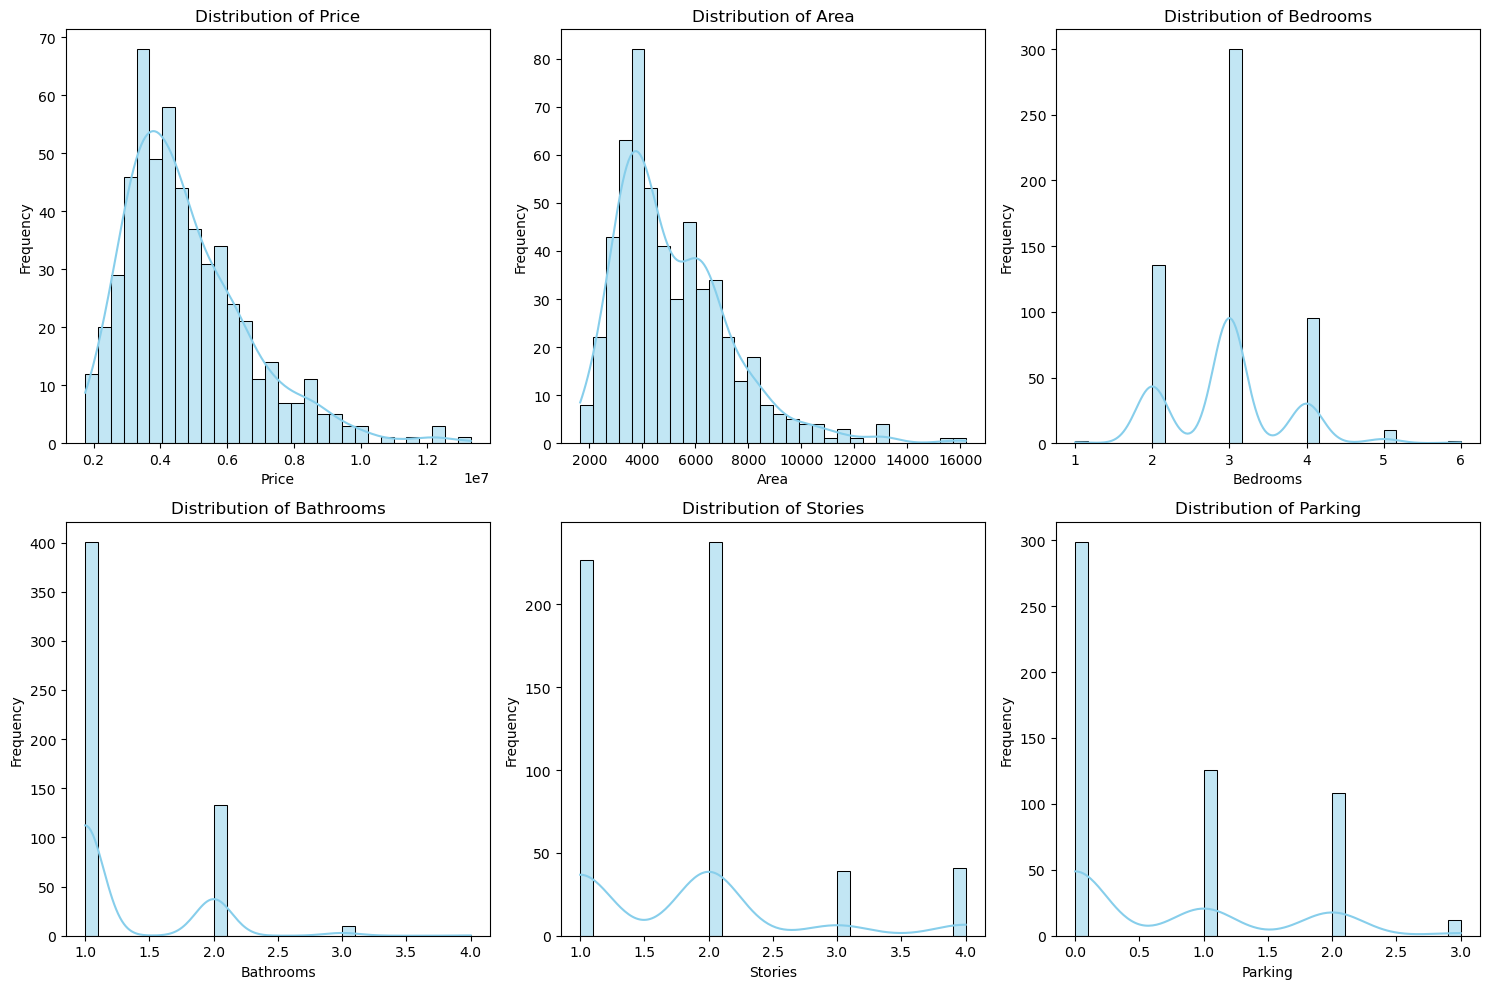

In [135]:
# List of numeric columns to analyze
numeric_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Feature Distributions

The histograms and KDE plots above show the distribution of the main numeric features in the housing dataset.  
- **Price** and **Area** are right-skewed, indicating that most houses are moderately priced and sized, with a few high-end outliers.  
- **Bedrooms**, **Bathrooms**, **Stories**, and **Parking** are more discrete in nature, with clear peaks around common values (e.g., 2–4 bedrooms).  

Understanding these distributions helps identify potential outliers and informs decisions around feature scaling or transformations for modeling.


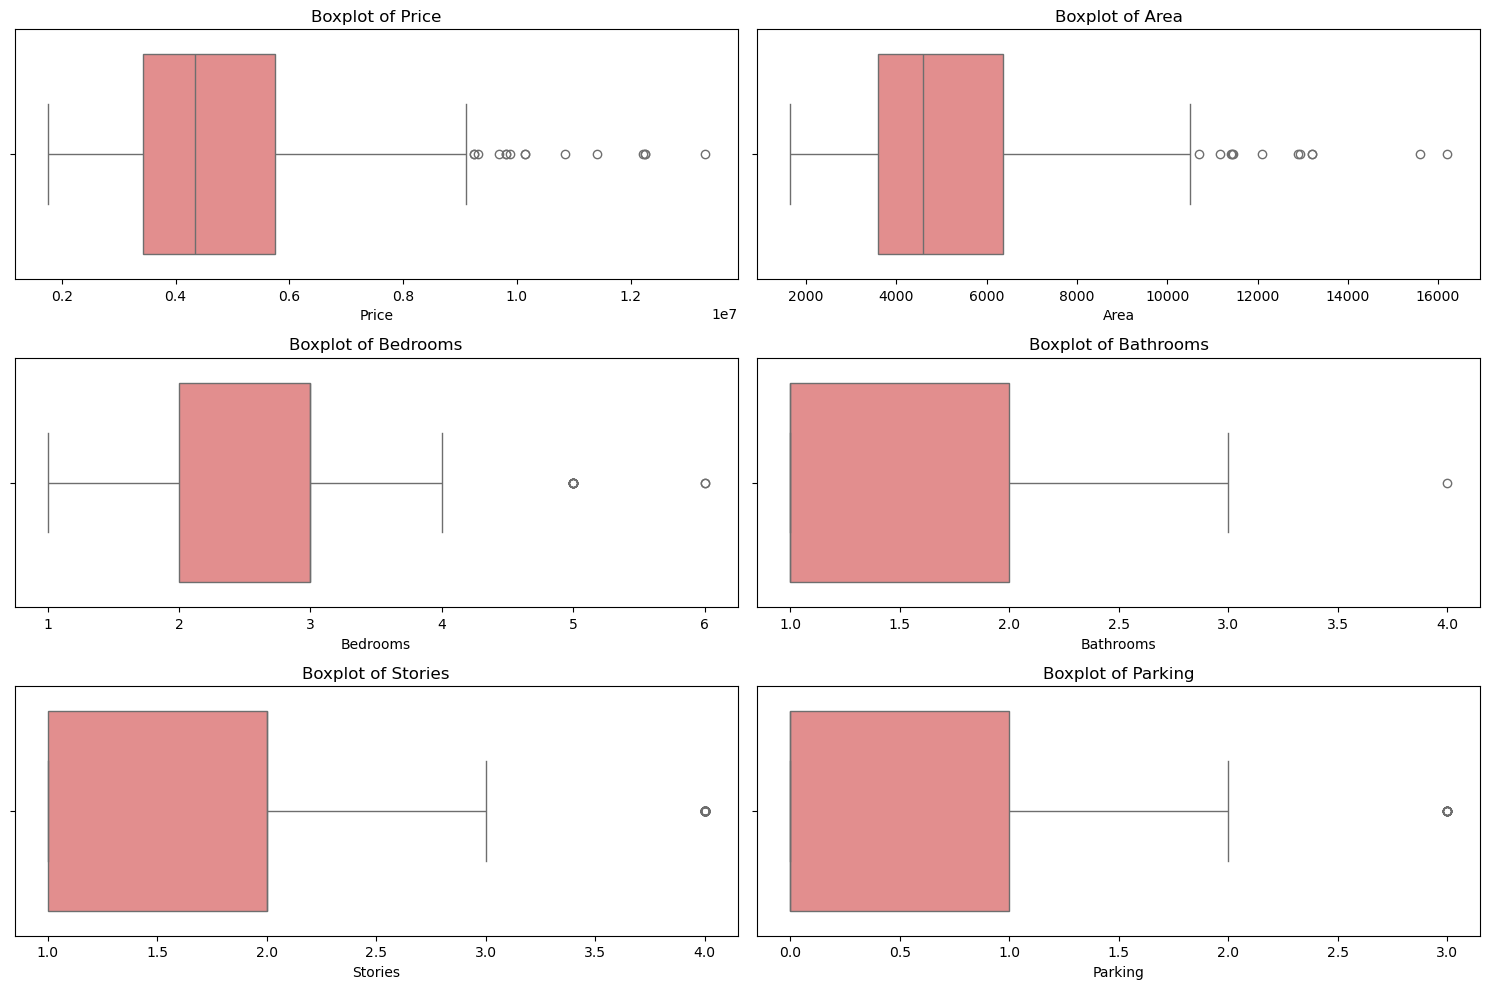

In [138]:

# List of numeric columns to analyze
numeric_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']

# Set the figure size
plt.figure(figsize=(15, 10))

# Generate boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Outlier Detection

The boxplots above reveal the presence of outliers or extreme values in the housing dataset.  
For example:

- **Price** and **Area** contain several high-end outliers indicating particularly large or expensive properties.  
- **Bedrooms** and **Bathrooms** show occasional unusually high counts, which may represent luxury or multi-family homes.  

Outliers can influence the performance of machine learning models, so we will consider appropriate handling strategies during preprocessing if needed.


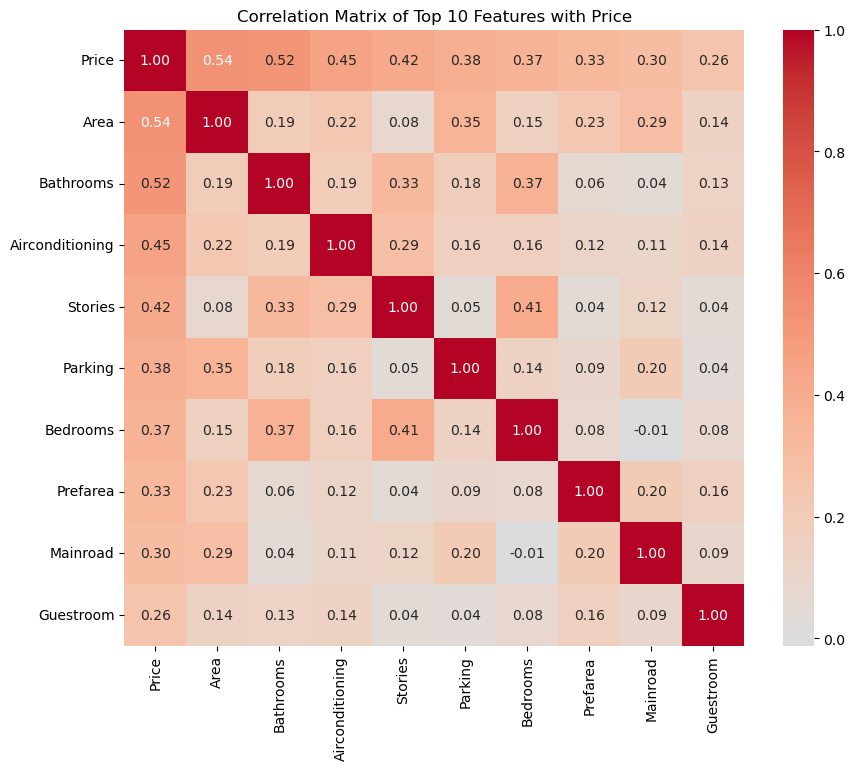

In [141]:
target = 'Price'
numeric_cols = df.select_dtypes(include='number').columns

corr = df[numeric_cols].corr()
top_n = 10
top_feats = corr[target].abs().sort_values(ascending=False).index[:top_n]

plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[top_feats, top_feats], annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title(f'Correlation Matrix of Top {top_n} Features with {target}')
plt.show()

## Correlation Analysis

I calculated the correlations between the features and the target variable, **Price**. The strongest positive correlations are with:

- **Area** (correlation ≈ 0.54): Larger house areas tend to have higher prices.
- **Bathrooms** (correlation ≈ 0.52): More bathrooms are associated with higher prices.
- **Air Conditioning** (correlation ≈ 0.45): Houses with air conditioning tend to have higher prices.
- **Stories** (correlation ≈ 0.42): Houses with more stories generally cost more.

These correlations suggest that these features are likely important predictors of house price in this dataset.


/var/folders/pm/bh5rgtjj6s522l07_0djlp_4tjf0q1/T/ipykernel_22239/3327401427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Price'], palette='pastel')
/var/folders/pm/bh5rgtjj6s522l07_0djlp_4tjf0q1/T/ipykernel_22239/3327401427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Price'], palette='pastel')
/var/folders/pm/bh5rgtjj6s522l07_0djlp_4tjf0q1/T/ipykernel_22239/3327401427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['Price'], palette='pastel')


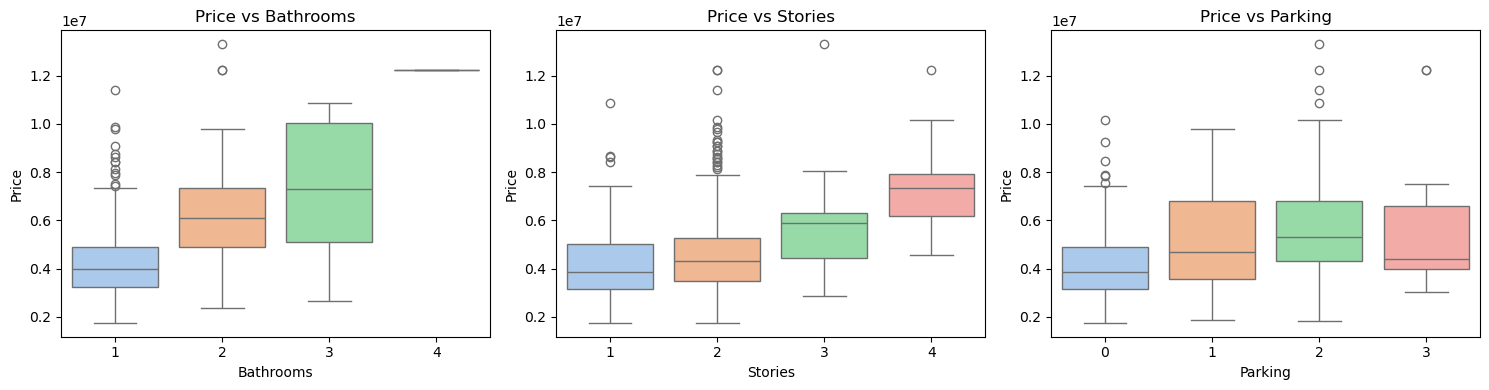

In [146]:
# Boxplots for Discrete Features vs Price
key_features = ['Bathrooms', 'Stories', 'Parking']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature], y=df['Price'], palette='pastel')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Boxplots: Price vs. Discrete Features

The boxplots below compare the distribution of house prices across different values for **Bathrooms**, **Stories**, and **Parking**:

- **Bathrooms**: Houses with more bathrooms tend to have higher prices on average.
- **Stories**: Similarly, more stories are associated with slightly higher prices.
- **Parking**: The number of parking spaces does not show a strong impact on price; the variation is minimal across categories 1-3.

Overall, bathrooms and stories may be weak positive indicators of price, while parking appears to have little influence.


## Feature Engineering

Based on observations:
- The `Price` and `Area` distributions are right-skewed; a log transformation might improve modeling.
- Some categorical features could be combined or further explored.


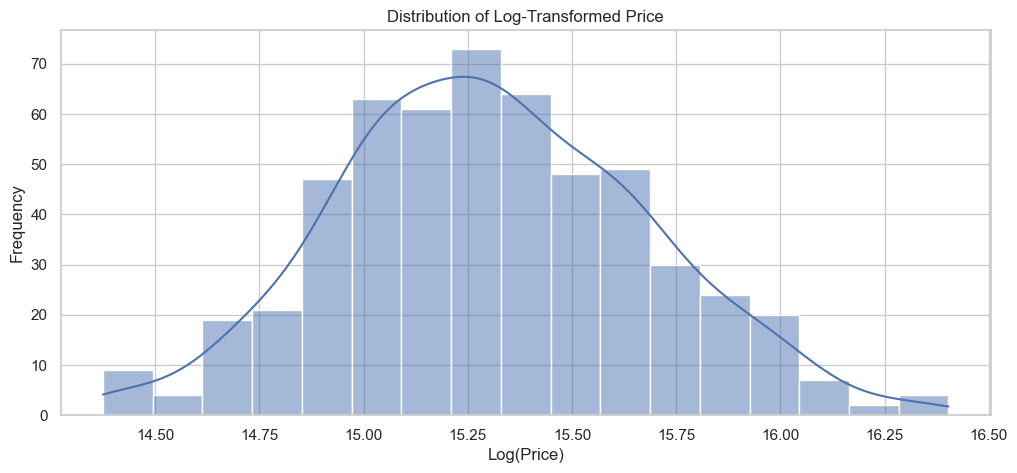

In [233]:
# Log transform skewed features
df['log_price'] = np.log1p(df['Price'])
df['log_area'] = np.log1p(df['Area'])

# Check transformed distributions
plt.figure(figsize=(12, 5))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

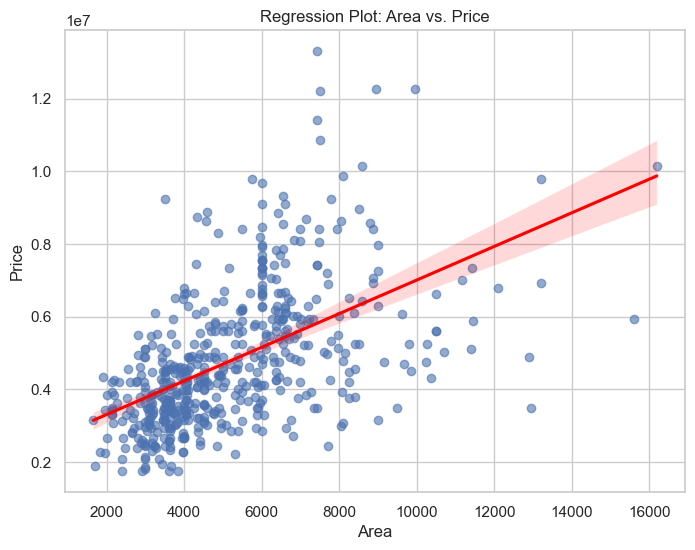

In [235]:
# Set plot style
sns.set(style="whitegrid")

# Create regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Area', y='Price', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add titles and labels
plt.title('Regression Plot: Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')

# Show the plot
plt.show()

### Regression Plot: Area vs. Price

This plot shows the relationship between the size of a house (`Area`) and its `Price`. As expected, there is a positive correlation - larger homes generally tend to be more expensive. However, the relationship is not perfectly linear, suggesting that other factors besides area also influence price. 

When using the log-transformed price (`log_price`), the relationship becomes more linear and helps reduce the impact of extreme outliers. This transformation makes it easier for regression models to capture the underlying trend. The regression line in the plot confirms that, on average, an increase in area is associated with an increase in price.


## Modeling: Predicting House Price

We'll compare three regression models:
- Linear Regression
- Polynomial Regression
- Ridge Regression with hyperparameter tuning

Performance will be evaluated using RMSE, MAE, and R².


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression - using only 'Area' as the feature
X_simple = df[['Area']]
y_simple = df['log_price']

# Train-test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Fit simple linear regression model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

# Predict
y_pred_simple = lr_simple.predict(X_test_simple)

# Evaluate
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f'Simple Linear Regression (Area only) performance:\nRMSE: {rmse_simple:.4f}\nMAE: {mae_simple:.4f}\nR²: {r2_simple:.4f}')


Simple Linear Regression (Area only) performance:
RMSE: 0.3698
MAE: 0.3069
R²: 0.2919


### Simple Linear Regression Results

A simple linear regression model using **Area** as the sole predictor of `log_price` resulted in:

- **RMSE:** 0.3698  
- **MAE:** 0.3069  
- **R²:** 0.2919  

These metrics indicate that Area alone explains roughly 29% of the variability in house prices. While this shows a positive relationship, the model’s predictive power is limited with only one feature.

### Next Steps

To improve performance, I plan to incorporate additional features that have shown some correlation with price, such as **Bathrooms**, **Stories**, **Parking**, and **Airconditioning**. Including these variables should provide a more comprehensive view of factors influencing price and enhance the model’s accuracy.


In [261]:
# Define features and target
features = ['Area', 'Bathrooms', 'Stories', 'Parking', 'Airconditioning']  # adjust as needed
X = df[features]
y = df['log_price']  # assuming log transformation has already been applied

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [259]:
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # This returns MSE by default
rmse = np.sqrt(mse)  # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression performance:\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}')



Linear Regression performance:
RMSE: 0.2868
MAE: 0.2342
R²: 0.5741


### Multiple Linear Regression Results

By including additional features—**Bathrooms**, **Stories**, **Parking**, and **Airconditioning**—along with **Area**, the multiple linear regression model’s performance improved significantly:

- **RMSE:** 0.2868  
- **MAE:** 0.2342  
- **R²:** 0.5741  

Compared to the simple linear regression with only Area, this model explains about 57% of the variance in housing prices, almost double the previous R² value. The lower RMSE and MAE values also indicate more accurate predictions overall.

### Next Steps

To capture potential nonlinear relationships between features and price, I will use **Polynomial Regression**. This approach can model interactions and curved patterns in the data, which linear regression might miss, potentially further improving prediction accuracy.


In [243]:
# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

poly_rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f'Polynomial Regression (Degree 2):\nRMSE: {poly_rmse:.4f}\nMAE: {poly_mae:.4f}\nR²: {poly_r2:.4f}')

Polynomial Regression (Degree 2):
RMSE: 0.2790
MAE: 0.2222
R²: 0.5968


### Polynomial Regression Results (Degree 2)

Using polynomial features of degree 2, the regression model captures nonlinear relationships and feature interactions. This improved the model performance compared to multiple linear regression:

- **RMSE:** 0.2790 
- **MAE:** 0.2222 
- **R²:** 0.5968 

The increase in R² indicates the model explains nearly 60% of the variance in housing prices, showing a better fit. Polynomial regression helps reveal more complex patterns that linear regression misses, improving prediction accuracy.


In [266]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define features and target (same as before)
features = ['Area', 'Bathrooms', 'Stories', 'Parking', 'Airconditioning']
X = df[features]
y = df['log_price']

# Train-test split (same random_state for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression model
ridge = Ridge()

# Define alpha values to try (regularization strength)
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search with 4-fold cross-validation
grid_search = GridSearchCV(ridge, alpha_values, cv=4, scoring='neg_mean_squared_error')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Best Ridge Regression alpha: {best_alpha}')

# Predict with best estimator on test set
y_pred_ridge = grid_search.best_estimator_.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression performance (alpha={best_alpha}):')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'MAE: {mae_ridge:.4f}')
print(f'R²: {r2_ridge:.4f}')


Best Ridge Regression alpha: 0.01
Ridge Regression performance (alpha=0.01):
RMSE: 0.2868
MAE: 0.2342
R²: 0.5741


## Ridge Regression Hyperparameter Tuning Report

To improve the Ridge Regression model, I used a grid search to tune the **alpha** hyperparameter, which controls the amount of regularization applied to the model coefficients. The grid search tested several alpha values: `[0.01, 0.1, 1, 10, 100]`, using 4-fold cross-validation to evaluate performance based on the negative mean squared error.

The best alpha value found was **0.01**, indicating that a low level of regularization yields the best balance between bias and variance for this dataset. With this alpha, the Ridge model achieved the following metrics on the test set:

- **RMSE:** 0.2868  
- **MAE:** 0.2342  
- **R²:** 0.5741  

These results suggest the model explains about 57% of the variance in the target variable, which is decent but not the best among the models tested.

Lower alpha values mean less penalty on the coefficients, allowing the model more flexibility to fit the data. The fact that the best alpha is quite small indicates the model benefits from minimal regularization and is not severely overfitting.

While Ridge Regression improved model stability, the Polynomial Regression model still outperformed it, showing better predictive accuracy. To further evaluate the Polynomial model's fit and check for any patterns in prediction errors, I will create a residuals plot next. This will help verify if the model assumptions hold and if the model is capturing the data well.


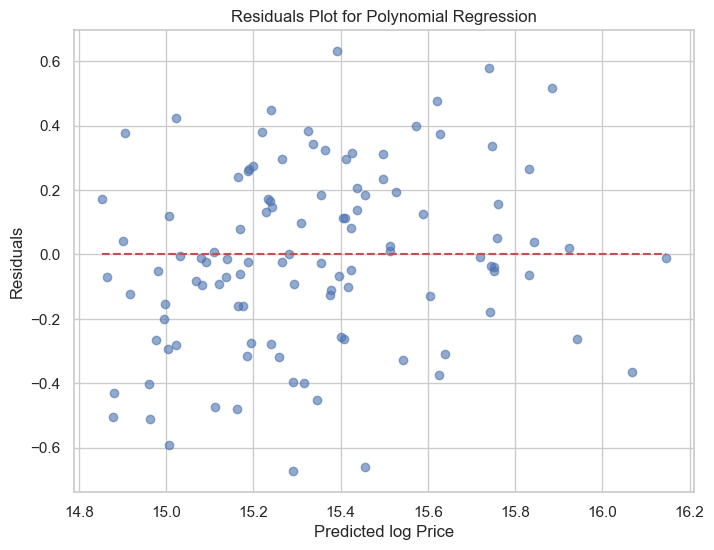

In [278]:
residuals = y_test - y_poly_pred

plt.figure(figsize=(8,6))
plt.scatter(y_poly_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=y_poly_pred.min(), xmax=y_poly_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted log Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Polynomial Regression')
plt.show()

### Residuals Analysis and Model Fit

The residuals plot for the polynomial regression model shows that the residuals (errors) are evenly distributed above and below the zero line, with no obvious patterns or trends. This indicates that the model fits the data well and that the assumptions of linearity and homoscedasticity are reasonably satisfied.

Since the residuals appear random and balanced, it suggests there is no systematic error left unexplained by the model. Therefore, this polynomial regression model is likely capturing the underlying relationship as well as possible with the current features, and further improvements might be minimal without adding new data or features.


## Conclusion

In this project, I explored the relationship between various housing features and their prices using a housing dataset. Initial correlation analysis showed that features such as larger area, more bathrooms, more stories, parking availability, and air conditioning tend to be positively associated with higher house prices, which aligns with expectations.


After performing exploratory data analysis, I applied several regression models including simple linear regression, multiple linear regression, polynomial regression, and ridge regression to predict house prices based on selected features.

The polynomial regression model with degree 2 provided the best performance, achieving the lowest error metrics and highest R² score, indicating it captured the nonlinear relationships in the data more effectively than linear models. Ridge regression helped in regularizing the model but did not outperform the polynomial model in this case.

Residual analysis confirmed that the polynomial regression model fits the data well, with residuals evenly distributed around zero and no evident patterns, suggesting the model assumptions are satisfied.

Overall, the project demonstrated the importance of feature selection, model choice, and hyperparameter tuning in building accurate predictive models for housing prices. Further improvements could involve incorporating additional relevant features or exploring more advanced modeling techniques. Thank you!
